# EDA

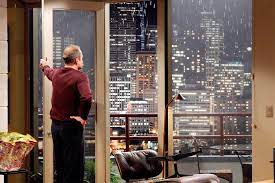

In [ ]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
#import the data from a csv-file
data = pd.read_csv('data/eda_combined.csv')
data.head()

### Research Questions and Hypothesis Generation for the following client

| Name                | client | Characteristics                                                                                                                                                                 |
| ------------------- | ----------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Charles Christensen | Seller      | Invest with big returns, wondering about renovation?, which Neighborhood? Timing?      



--- *Research Questions* are questions that arise from a researcher guessing about reality (data). They are written in the form of a question.
--- *Hypotheses* are assumptions or educated guesses we make about the data, using our domain knowledge. You can form a hypothesis in the form of *"if/then"* or *"the more the"*. A Hypothesis is formed as a measurable (operationisable) statement you can validate by looking at data.
--- A research question can have multiple hypotheses attached to it.


### Hypothesis 

|               | Question Hypotheses | Indicators                                                                                                                                                                |
| ------------------- | ----------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| 1 | If the house is centrally located? | The closer a house is to the city center, the higher the price| - geolocation       |
| 2 | If the old house was renovated? when? |  the newly renovated house should have higher prices      |
| 3 | If the house is big in size? |  Number of bedrooms, bathroom and overall squarefoot are of the height should be directly propotional to the price of the house     |
| 4 | If the house has a view | A waterfront  view should increase the price   |
| 5| If certain neighborhod affects the price| Houses with same parameters such bedrooms, bathrooms, overall area had increase in price or not over the years   |
| 6| Timing of the sell | what would be the ideal time to sell the house? season, months..   |



In [ ]:
fig = plt.figure(figsize=(8, 8))  #creating a map outline of Seattle
m = Basemap(projection='lcc', resolution='h', 
            lat_0=47.5, lon_0=-122,
            width=1E6, height=1E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
# m.scatter(data['long'], data['lat'], latlon=True,
#           c=np.log10(data['price']), s=area,
#           cmap='Reds', alpha=0.5)

# # 3. create colorbar and legend
# plt.colorbar(label=r'$\log_{10}({\rm population})$')
# plt.clim(3, 7)

In [ ]:
data['bedrooms'] = data['bedrooms'].astype(int)  #converting the bedroom values into integers
data

In [ ]:
data.info()

In [ ]:
# data.count() does not include NaN values
df2 = data[[column for column in data if data[column].count() / len(data) >= 0.3]]
del df2['id']
print("List of dropped columns:", end=" ")
for c in data.columns:
    if c not in df2.columns:
        print(c, end=", ")
print('\n')
data = df2

In [ ]:
test = data.groupby(['bathrooms', 'price'])['sqft_lot'].value_counts()  #checking if the float values of the bathroom has some impact on price. for eg 0.5, 0.75 etc
print(test.to_string())


In [ ]:
for item in data['bathrooms']:  #checking if bathrooms has integer or float values
    if not item.is_integer():
        print(item)

In [ ]:
data.head()

In [ ]:
data.columns

In [ ]:
data.isna()

In [ ]:
data.isna().sum() #to check what columns have NA values

In [ ]:
data.columns

In [ ]:
data['waterfront'].unique() #checking the values in waterfront

### data_int 
- It is the datframe whoch is copy of data() , it has all the values as integers apart from bathrooms and sqft_basement and date in dat time format

### data_int_a
- This is the datframe which is copy of data_int and has assumptions fro view and waterfront '0' where the values are not given



In [ ]:
data_int=data.copy()
data_int.head()

In [ ]:
data_int.isna().sum()

In [ ]:
data_int['sqft_living'] = data_int['sqft_living'].astype(int)  #converting all the collumns itterable possible into integers

In [ ]:
# Change columns values to integers
data_int = data_int.astype({'sqft_lot': int, 'floors': int, 'sqft_above': int, 'sqft_living15' : int, 'sqft_lot15': int, 'price': int })

print("\nConverted:\n")

# Print altered DataFrame
print(data_int)
# Print data types of each column in DataFrame
print("\n")
print(data_int.dtypes)


In [ ]:
data_int["date"] = pd.to_datetime(data_int["date"])

In [ ]:
data_int.head()

In [ ]:
data_int['yr_renovated'] = data_int['yr_renovated'].apply(lambda x: (x/10)) 

In [ ]:
data_int= data_int.fillna({'yr_renovated': 0}) # replacing nan to zero so that i can make this colum divided by 10 so that the year is in proper format
#data_int['yr_renovated'] = data_int['yr_renovated'].astype(int) # converting it back to integer

In [ ]:
data_int['yr_renovated']= data_int['yr_renovated'].replace(0, np.nan, inplace=True) # since 0 doesnt mean anything, convert zeros to nan, that means not known

In [ ]:
data_int.isna().sum() #to check what columns have NA values

In [ ]:
data_int_a= data_int.copy()

In [ ]:
data_int_a= data_int_a.fillna({'view' : 0, 'waterfront': 0}) #assuming that wheere the values are nana, its '0' that means assumption is view or waterfront is not present
data_int_a = data_int_a.astype({'view': int, 'waterfront': int}) # convertint to integers
data_int_a

In [ ]:
data_int_a.info()

In [ ]:
df= data_int_a.copy()

In [ ]:
import folium
from folium.plugins import MarkerCluster
from folium import plugins

In [ ]:
import folium
from folium.plugins import MarkerCluster

# Create a map centered around Seattle
seattle_map = folium.Map(location=[47.6062, -122.3321], zoom_start=10)

# Define coordinates for the city center
city_center = [47.6062, -122.3321]

# Add marker for the city center
folium.Marker(
    location=city_center,
    popup="City Center",
    icon=folium.Icon(color='blue', icon='info-sign')
).add_to(seattle_map)

# Add marker clusters for each property
marker_cluster = MarkerCluster().add_to(seattle_map)

# Get the quartiles of property prices
price_quartiles = filtered_data['price'].quantile([0, 0.25, 0.5, 0.75, 1])

# Define custom legend HTML
legend_html = """
<div style="position: fixed; 
     bottom: 50px; left: 50px; width: 200px; height: 200px; 
     border:2px solid grey; z-index:9999; font-size:14px;
     background-color: white;
     ">
     &nbsp;<b>Legend</b><br>
     &nbsp;<i class="dot" style="background: green;"></i>&nbsp; Low Priced Locations (${:,} - ${:,})<br>
     &nbsp;<i class="dot" style="background: yellow;"></i>&nbsp; Medium Priced Locations (${:,} - ${:,})<br>
     &nbsp;<i class="dot" style="background: orange;"></i>&nbsp; Moderately High Priced Locations (${:,} - ${:,})<br>
     &nbsp;<i class="dot" style="background: red;"></i>&nbsp; High Priced Locations (${:,} - ${:,})<br>
</div>
""".format(
    int(price_quartiles.iloc[0]),
    int(price_quartiles.iloc[1]),
    int(price_quartiles.iloc[1]),
    int(price_quartiles.iloc[2]),
    int(price_quartiles.iloc[2]),
    int(price_quartiles.iloc[3]),
    int(price_quartiles.iloc[3]),
    int(price_quartiles.iloc[4])
)

# Add the legend to the map
seattle_map.get_root().html.add_child(folium.Element(legend_html))

# Iterate through the DataFrame and add markers for each property
for index, row in df.iterrows():
    # Define color and popup message based on property price
    if row['price'] <= price_quartiles.iloc[1]:
        color = 'green'
        price_range = f"(${int(price_quartiles.iloc[0])} - ${int(price_quartiles.iloc[1])})"
    elif row['price'] <= price_quartiles.iloc[2]:
        color = 'yellow'
        price_range = f"(${int(price_quartiles.iloc[1])} - ${int(price_quartiles.iloc[2])})"
    elif row['price'] <= price_quartiles.iloc[3]:
        color = 'orange'
        price_range = f"(${int(price_quartiles.iloc[2])} - ${int(price_quartiles.iloc[3])})"
    else:
        color = 'red'
        price_range = f"(${int(price_quartiles.iloc[3])} - ${int(price_quartiles.iloc[4])})"

    # Add marker with popup and color
    folium.Marker(
        location=[row['lat'], row['long']],
        popup=f"Price: ${row['price']} (Index: {index})<br>Price Range: {price_range}",
        icon=folium.Icon(color=color),
    ).add_to(marker_cluster)

# Define the city center boundary coordinates
city_center_boundary = [
    [47.5, -122.4],
    [47.7, -122.4],
    [47.7, -122.2],
    [47.5, -122.2],
    [47.5, -122.4]
]

# Add the city center boundary to the map
folium.Polygon(
    locations=city_center_boundary,
    color='blue',
    fill=True,
    fill_color='blue',
    fill_opacity=0.2
).add_to(seattle_map)

# Save the map as an HTML file
seattle_map.save("seattle_property_map_with_legend_and_city_center.html")
seattle_map


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

In [ ]:
q_hi = df_stats["price"].quantile(0.99)
q_low = df_stats["price"].quantile(0.01)


In [ ]:
df_filtered = df_stats[(df_stats["price"] < q_hi) & (df_stats["price"] > q_low)]

In [ ]:
df_stats = pd.DataFrame(np.random.randn(100, 3))

df_stats[(np.abs(stats.zscore(df_stats)) < 3).all(axis=1)]

In [ ]:
groupby_obj_view = data_int_a.groupby('view')

In [ ]:
view = groupby_obj_view.count()['price']
view

In [ ]:
#data_engg = df_job_title[(df_job_title['latest_job_role'] == 'Data Engineer')].groupby('programming_language_recommended').count()['latest_job_role']
plt.subplot()
plt.pie(view)
plt.title('Property distribution by view')
plt.axis('equal')
#plt.legend(B.index, loc=5)
plt.legend(view.index, bbox_to_anchor=(1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.tight_layout()
plt.show()

In [ ]:
groupby_obj_waterfront = filtered_data.groupby('waterfront')
waterfront = groupby_obj_waterfront.count()['price']

In [ ]:
plt.subplot()
plt.pie(waterfront)
plt.title('Property distribution by waterfront')
plt.axis('equal')
#plt.legend(B.index, loc=5)
plt.legend(waterfront.index, bbox_to_anchor=(1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# City center coordinates
city_center_long = -122.3321
city_center_lat = 47.6062

# Scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(df['long'], df['lat'], c=df['price'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Price Distribution by Location')

# Plot city center as a red point
plt.scatter(city_center_long, city_center_lat, c='red', label='City Center')

plt.legend()
plt.grid(True)
plt.show()


In [ ]:
data_int_a.query('waterfront == 1').count()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot of the price distribution
print(data_int_a['price'].describe())
plt.figure(figsize=(10, 6))
sns.boxplot(y='price', data=data_int_a)
plt.title('Distribution of House Prices')
plt.ylabel('Price')
#plt.savefig('dprice_dist_with_outliers.png')
plt.show()

In [ ]:
print(data_int_a['price'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(data_int_a['price'], color='g', bins=100, hist_kws={'alpha': 0.4});
#plt.savefig('price_distribution_with-outliers.png')

In [ ]:
# Calculate quartiles for 'price' column
Q1_price = df['price'].quantile(0.25)
Q3_price = df['price'].quantile(0.75)

# Calculate IQR for 'price' column
IQR_price = Q3_price - Q1_price

# Define upper bound for 'price' column
upper_bound_price = Q3_price + 1.5 * IQR_price

# Remove upper outliers in 'price' column
filtered_data = df[df['price'] <= upper_bound_price]

# Print the shape of the original and filtered data to see how many outliers were removed
print("Original shape:", df.shape)
print("Shape after removing upper outliers:", filtered_data.shape)

In [ ]:
filtered_data.to_csv('filtered_data.csv', index=False)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot of the price distribution
print(filtered_data['price'].describe())
plt.figure(figsize=(10, 6))
sns.boxplot(y='price', data=filtered_data)
plt.title('Distribution of House Prices')
plt.ylabel('Price')
plt.savefig('price_dist_without_outliers.png')
plt.show()

In [ ]:
print(filtered_data['price'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(filtered_data['price'], color='g', bins=100, hist_kws={'alpha': 0.4});


In [ ]:
list(set(data_int_a.dtypes.tolist()))

In [ ]:
df_num = filtered_data.select_dtypes(include = ['float64', 'int64'])
df_num.head()

In [ ]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations


In [ ]:
import matplotlib.pyplot as plt

# City center coordinates
city_center_long = -122.3321
city_center_lat = 47.6062

# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(filtered_data['long'], filtered_data['lat'], c=filtered_data['price'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Price')

# Add a marker for the city center
plt.scatter(city_center_long, city_center_lat, c='red', label='City Center')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Price Distribution by Location')
plt.legend()
plt.grid(True)
#plt.savefig('dist_city_center_heatmap.png')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Define city center coordinates for multiple cities in King County
city_centers = {
    'Seattle': {'longitude': -122.3321, 'latitude': 47.6062},
    'Bellevue': {'longitude': -122.2007, 'latitude': 47.6104},
    'Redmond': {'longitude': -122.1215, 'latitude': 47.6739},
    'Kirkland': {'longitude': -122.2087, 'latitude': 47.6769},
    'Renton': {'longitude': -122.2171, 'latitude': 47.4829}
}

# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(filtered_data['long'], filtered_data['lat'], c=filtered_data['price'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Price')

# Add markers for each city center with different colors
colors = ['blue',  'orange', 'green', 'purple', 'red']
for idx, (city, coords) in enumerate(city_centers.items()):
    plt.scatter(coords['longitude'], coords['latitude'], c=colors[idx], label=city + ' Center', s=100)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Price Distribution by Location')
plt.legend()
plt.grid(True)
plt.savefig('dist_multiple_city_centers_heatmap.png')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define distance intervals (e.g., every 1 kilometer)
distance_intervals = np.arange(0, 16, 1)  # Example intervals, adjust as needed

# Function to calculate distance from city centers using Haversine formula
def haversine(lat1, lon1, lat2_list, lon2_list):
    R = 6371  # Radius of the Earth in kilometers

    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2_list, lon2_list = map(np.radians, [lat1, lon1, lat2_list, lon2_list])

    # Calculate differences in latitude and longitude
    dlat = lat2_list - lat1
    dlon = lon2_list - lon1

    # Calculate the square of half the chord length between the points
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2_list) * np.sin(dlon / 2) ** 2

    # Calculate the angular distance in radians
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    # Calculate the distance
    distance = R * c

    return distance

# Example coordinates of the city centers in King County (Seattle, Bellevue, Redmond)
city_centers = {
    'Seattle': {'latitude': 47.6062, 'longitude': -122.3321},
    'Bellevue': {'latitude': 47.6104, 'longitude': -122.2007},
    'Redmond': {'latitude': 47.6739, 'longitude': -122.1215}
}

# Calculate distance from each city center for each location in the filtered data
for city, center_coords in city_centers.items():
    filtered_data[f'distance_from_{city.lower()}_center_km'] = haversine(center_coords['latitude'], center_coords['longitude'], filtered_data['lat'], filtered_data['long'])

# Group data by distance intervals and calculate average price for each interval
avg_price_by_distance = pd.DataFrame()
for city in city_centers.keys():
    avg_price_by_distance[city] = filtered_data.groupby(pd.cut(filtered_data[f'distance_from_{city.lower()}_center_km'], bins=distance_intervals))['price'].mean()

# Plot average price against distance intervals
plt.figure(figsize=(10, 6))
for city in city_centers.keys():
    plt.plot(avg_price_by_distance.index.astype(str), avg_price_by_distance[city], marker='o', label=city)

plt.xlabel('Distance from City Centers (km)')
plt.ylabel('Average Price')
plt.title('Average Price vs. Distance from City Centers')
plt.xticks(distance_intervals, distance_intervals)  # Set x-axis ticks to match distance intervals
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.savefig('dist_city_centers_lineplot_kms')
plt.show()


In [ ]:
df_num_corr = df_num.corr()['price'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['yr_renovated'], filtered_data['price'], alpha=0.5)
plt.xlabel('Year Renovated')
plt.ylabel('Price')
plt.title('Price vs. Year Renovated')
plt.grid(True)
plt.show()


In [ ]:

import matplotlib.pyplot as plt

# Calculate the number of houses renovated in each year
houses_renovated_by_year = filtered_data['yr_renovated'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(15, 6))
houses_renovated_by_year.plot(kind='bar', color='skyblue')
plt.xlabel('Year Renovated')
plt.ylabel('Number of Houses Renovated')
plt.title('Number of Houses Renovated by Year')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('year_renovated_no_of_houses_barplot.png')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Calculate the average price for each number of houses renovated
avg_price_by_renovated = filtered_data.groupby('yr_renovated')['price'].mean()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(avg_price_by_renovated.index, avg_price_by_renovated.values, alpha=0.5,  marker='o', linestyle='-')
plt.xlabel('Number of Houses Renovated')
plt.ylabel('Average Price')
plt.title('Average Price vs. Number of Houses Renovated')
plt.grid(True)
plt.savefig('year_renovated_lineplot_scattered.png')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Calculate the average price for each number of houses renovated
avg_price_by_renovated = filtered_data.groupby('yr_renovated')['price'].mean()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.plot(avg_price_by_renovated.index, avg_price_by_renovated.values, alpha=0.5,  marker='o', linestyle='-')
plt.xlabel('Number of Houses Renovated')
plt.ylabel('Average Price')
plt.title('Average Price vs. Number of Houses Renovated')
plt.grid(True)
#plt.savefig('year_renovated_lineplot_nolinearline.png')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Calculate the average price for each number of houses renovated
avg_price_by_renovated = filtered_data.groupby('yr_renovated')['price'].mean()

# Fit a linear regression line to the data
slope, intercept, r_value, p_value, std_err = linregress(avg_price_by_renovated.index, avg_price_by_renovated.values)
x_values = np.array(avg_price_by_renovated.index)
y_values = slope * x_values + intercept

# Create a line plot with the linear regression line
plt.figure(figsize=(10, 6))
plt.plot(avg_price_by_renovated.index, avg_price_by_renovated.values, marker='o', linestyle='', label='Average price at this time point')
plt.plot(x_values, y_values, linestyle='-', color='red', label='Approximate linear increase')
plt.xlabel('Number of Houses Renovated')
plt.ylabel('Average Price')
plt.title('Average Price vs. Number of Houses Renovated')
plt.legend()
plt.grid(True)
plt.savefig('year_renovated_lineplot.png')
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create box plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='bedrooms', y='price', data=filtered_data)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')

plt.subplot(1, 2, 2)
sns.boxplot(x='bathrooms', y='price', data=filtered_data)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.savefig('bedrooms_bathrooms_boxplot.png')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Calculate the average price for each number of houses renovated
avg_price_by_year_built = filtered_data.groupby('yr_built')['price'].mean()

# Fit a linear regression line to the data
slope, intercept, r_value, p_value, std_err = linregress(avg_price_by_renovated.index, avg_price_by_renovated.values)
x_values = np.array(avg_price_by_renovated.index)
y_values = slope * x_values + intercept

# Create a line plot with the linear regression line
plt.figure(figsize=(10, 6))
plt.plot(avg_price_by_year_built.index, avg_price_by_year_built.values, marker='o', linestyle='', label='Average price at this time point')
plt.plot(x_values, y_values, linestyle='-', color='red', label='Approximate linear increase')
plt.xlabel('year built')
plt.ylabel('Average Price')
plt.title('Average Price vs. Number of Houses ')
plt.legend()
plt.grid(True)
plt.savefig('year_built_lineplot.png')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Define the size of the bins
bin_size = 10

# Calculate the number of houses built in each bin
houses_built_per_bin = filtered_data.groupby(filtered_data['yr_built'] // bin_size * bin_size)['price'].count()

# Calculate the average price for each bin
avg_price_per_bin = filtered_data.groupby(filtered_data['yr_built'] // bin_size * bin_size)['price'].mean()

# Create bar plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
houses_built_per_bin.plot(kind='bar', color='skyblue')
plt.xlabel('Year Built (Binned)')
plt.ylabel('Number of Houses Built')
plt.title('Number of Houses Built by Year (Binned)')

plt.subplot(1, 2, 2)
avg_price_per_bin.plot(kind='bar', color='lightgreen')
plt.xlabel('Year Built (Binned)')
plt.ylabel('Average Price')
plt.title('Average Price by Year Built (Binned)')

plt.tight_layout()
plt.show()




In [ ]:
# Group data by 'yr_built' and calculate average price
avg_price_by_year = filtered_data.groupby('yr_built')['price'].mean()

# Create line plot
plt.figure(figsize=(12, 6))
plt.plot(avg_price_by_year.index, avg_price_by_year.values, marker='o', color='skyblue', linestyle='-')
plt.xlabel('Year Built')
plt.ylabel('Average Price')
plt.title('Average Price by Year Built')
plt.grid(True)
plt.show()



In [ ]:
import numpy as np

# Define the width of each bin (e.g., 10 years)
bin_width = 10

# Calculate the number of bins based on the bin width
min_year = filtered_data['yr_built'].min()
max_year = filtered_data['yr_built'].max()
num_bins = int(np.ceil((max_year - min_year) / bin_width))

# Define the bins
bins = [(min_year + i * bin_width, min_year + (i + 1) * bin_width) for i in range(num_bins)]

# Create a box plot for each bin
plt.figure(figsize=(12, 6))
for i, (start_year, end_year) in enumerate(bins):
    # Filter the data for the current bin
    bin_data = filtered_data[(filtered_data['yr_built'] >= start_year) & (filtered_data['yr_built'] < end_year)]
    
    # Calculate the average price for the current bin
    avg_price = bin_data['price'].mean()
    
    # Plot a box plot for the current bin
    plt.boxplot(bin_data['price'], positions=[i], widths=0.6, showfliers=False, patch_artist=True,
                boxprops=dict(facecolor='skyblue'))

# Set x-axis labels and limits
plt.xlabel('Year Built')
plt.ylabel('Average Price')
plt.title(f'Box Plots of Average Price for Every {bin_width} Years')
plt.xticks(range(num_bins), [f'{bins[i][0]}-{bins[i][1]}' for i in range(num_bins)], rotation=45)
plt.xlim(-0.5, num_bins - 0.5)
plt.grid(axis='y')
plt.show()



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create box plots for 'view'
plt.figure(figsize=(10, 6))
sns.boxplot(x='view', y='price', data=filtered_data)
plt.xlabel('View')
plt.ylabel('Price')
plt.title('Price Distribution by View')
plt.show()
plt.savefig('view_boxplot.png')

# Create box plots for 'waterfront'
plt.figure(figsize=(10, 6))
sns.boxplot(x='waterfront', y='price', data=filtered_data)
plt.xlabel('Waterfront')
plt.ylabel('Price')
plt.title('Price Distribution by Waterfront')
plt.savefig('waterfront_boxplot.png')
plt.show()


In [ ]:
# Calculate average price for each category of 'view' and 'waterfront'
avg_price_view = filtered_data.groupby('view')['price'].mean()
avg_price_waterfront = filtered_data.groupby('waterfront')['price'].mean()

# Create bar plots for 'view'
plt.figure(figsize=(10, 6))
avg_price_view.plot(kind='bar', color='skyblue')
plt.xlabel('View')
plt.ylabel('Average Price')
plt.title('Average Price by View')
plt.savefig('view_barplot.png')
plt.show()


In [ ]:
# Group data by 'view' and calculate average price
avg_price_by_view = filtered_data.groupby('view')['price'].mean()

# Group data by 'waterfront' and calculate average price
avg_price_by_waterfront = filtered_data.groupby('waterfront')['price'].mean()

# Create line plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
avg_price_by_view.plot(kind='line', marker='o', color='skyblue')
plt.xlabel('View')
plt.ylabel('Average Price')
plt.title('Average Price by View')

plt.subplot(1, 2, 2)
avg_price_by_waterfront.plot(kind='line', marker='o', color='lightgreen')
plt.xlabel('Waterfront')
plt.ylabel('Average Price')
plt.title('Average Price by Waterfront')
plt.savefig('lineplot_view_waterfront')

plt.tight_layout()
plt.show()
# Apply logarithmic transformation to prices
filtered_data['log_price'] = np.log(filtered_data['price'])

In [ ]:
# Apply logarithmic transformation to prices
filtered_data['log_price'] = np.log(filtered_data['price'])

# Group data by 'view' and calculate average price
avg_price_by_15 = filtered_data.groupby('sqft_living15')['log_price'].mean()

# Group data by 'waterfront' and calculate average price
avg_price_by_sqft_living = filtered_data.groupby('sqft_living')['log_price'].mean()

# Create line plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
avg_price_by_15.plot(kind='line', marker='o', color='skyblue')
plt.xlabel('sqft living 15')
plt.ylabel('Average Price')
plt.title('Average Price by living area 15')

plt.subplot(1, 2, 2)
avg_price_by_sqft_living.plot(kind='line', marker='o', color='lightgreen')
plt.xlabel('sqft living')
plt.ylabel('Average Price')
plt.title('Average Price by living area')
plt.savefig('lineplot_view_living area')

plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import ttest_ind

# Extract prices for properties with and without waterfront
price_waterfront_yes = filtered_data[filtered_data['waterfront'] == 1]['price']
price_waterfront_no = filtered_data[filtered_data['waterfront'] == 0]['price']

# Perform independent two-sample t-test
t_statistic, p_value = ttest_ind(price_waterfront_yes, price_waterfront_no)

# Interpret the results
if p_value < 0.05:
    print("The difference in average price between properties with and without waterfront is statistically significant.")
else:
    print("There is not enough evidence to conclude a significant difference in average price between properties with and without waterfront.")


In [ ]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform one-way ANOVA
f_statistic, p_value_anova = f_oneway(*[group['price'] for name, group in filtered_data.groupby('view')])

# Print the result of ANOVA
if p_value_anova < 0.05:
    print("The difference in average price among different levels of 'view' is statistically significant (p < 0.05).")
else:
    print("There is not enough evidence to conclude a significant difference in average price among different levels of 'view' (p >= 0.05).")

# Perform Tukey's HSD post-hoc test for pairwise comparisons
tukey_result = pairwise_tukeyhsd(filtered_data['price'], filtered_data['view'])

# Print the pairwise comparison results
print(tukey_result)


In [ ]:
from scipy.stats import f_oneway

# Perform one-way ANOVA
f_statistic, p_value_anova = f_oneway(*[group['price'] for name, group in filtered_data.groupby('view')])

# Print the result of ANOVA
if p_value_anova < 0.05:
    print("The difference in average price among different levels of 'view' is statistically significant (p < 0.05).")
else:
    print("There is not enough evidence to conclude a significant difference in average price among different levels of 'view' (p >= 0.05).")


In [ ]:
# Group data by 'season' and calculate average price
avg_price_by_season = filtered_data.groupby('season')['price'].mean()

# Define the order of seasons for plotting
season_order = ['Spring', 'Summer', 'Fall', 'Winter']

# Create line plot
plt.figure(figsize=(10, 6))
avg_price_by_season[season_order].plot(kind='line', marker='o', color='skyblue')
plt.xlabel('Season')
plt.ylabel('Average Price')
plt.title('Average Price by Season')
plt.xticks(range(4), season_order)
plt.grid(True)
plt.savefig('seasons_lineplot.png')
plt.show()


In [ ]:
# Define a function to map months to seasons
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

# Apply the function to the 'date' column to create a new 'season' column
filtered_data['season'] = filtered_data['date'].dt.month.apply(get_season)

# Create a box plot for each season
plt.figure(figsize=(12, 6))
filtered_data.boxplot(column='price', by='season', patch_artist=True, showfliers=False, grid=True)
plt.xlabel('Season')
plt.ylabel('Price')
plt.title('Box Plots of Price by Season')
plt.suptitle('')
plt.xticks([1, 2, 3, 4], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.savefig('seasons_boxplot.png')
plt.show()


In [ ]:
filtered_data.groupby('season')['price'].mean()

In [ ]:
from scipy.stats import f_oneway

# Perform one-way ANOVA
f_statistic, p_value_anova = f_oneway(*[group['price'] for name, group in filtered_data.groupby('season')])

# Print the result of ANOVA
if p_value_anova < 0.05:
    print("The difference in average price among different seasons is statistically significant (p < 0.05).")
else:
    print("There is not enough evidence to conclude a significant difference in average price among different seasons (p >= 0.05).")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Extract month information
# Assuming the date column is already in datetime format
filtered_data['month'] = filtered_data['date'].dt.month

# Step 2: Group data by month and calculate average price
avg_price_by_month = filtered_data.groupby('month')['price'].mean()

# Step 3: Visualize the relationship
plt.figure(figsize=(10, 6))
avg_price_by_month.plot(kind='line', marker='o', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Average Price by Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.savefig('Months_lineplot.png')
plt.show()


In [ ]:
# Visualize the relationship using a bar chart
plt.figure(figsize=(10, 6))
avg_price_by_month.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Average Price by Month')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.savefig('Months_barplot.png')
plt.show()


In [ ]:
# Create a new column for month
filtered_data['month'] = filtered_data['date'].dt.month


plt.figure(figsize=(12, 6))
filtered_data.boxplot(column='price', by='month', patch_artist=True, showfliers=False, grid=True)
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Box Plots of Price by Month')
plt.suptitle('')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.savefig('Months_boxplot.png')
plt.show()


In [ ]:
from scipy.stats import f_oneway

# Group data by month and calculate average price
avg_price_by_month = filtered_data.groupby(filtered_data['date'].dt.month)['price'].mean()

# Perform one-way ANOVA
f_statistic, p_value_anova = f_oneway(*[group['price'] for name, group in filtered_data.groupby(filtered_data['date'].dt.month)])

# Print the result of ANOVA
if p_value_anova < 0.05:
    print("The difference in average price among different months is statistically significant (p < 0.05).")
else:
    print("There is not enough evidence to conclude a significant difference in average price among different months (p >= 0.05).")


In [ ]:
from scipy.stats import f_oneway, kruskal

# Group data and calculate average price for months, views, fronts, and seasons
avg_price_by_month = filtered_data.groupby(filtered_data['date'].dt.month)['price'].mean()
avg_price_by_view = filtered_data.groupby('view')['price'].mean()
avg_price_by_front = filtered_data.groupby('waterfront')['price'].mean()
avg_price_by_season = filtered_data.groupby('season')['price'].mean()

# Identify the highest value for each group
highest_month = avg_price_by_month.idxmax()
highest_view = avg_price_by_view.idxmax()
highest_front = avg_price_by_front.idxmax()
highest_season = avg_price_by_season.idxmax()

# Perform statistical tests for each group
_, p_value_month = f_oneway(*[group['price'] for name, group in filtered_data.groupby(filtered_data['date'].dt.month)])
_, p_value_view = kruskal(*[group['price'] for name, group in filtered_data.groupby('view')])
_, p_value_front = kruskal(*[group['price'] for name, group in filtered_data.groupby('waterfront')])
_, p_value_season = f_oneway(*[group['price'] for name, group in filtered_data.groupby('season')])

# Print comments based on the results
if p_value_month < 0.05:
    print(f"The highest average price for the month {highest_month} is statistically significant.")
else:
    print("There is not enough evidence to conclude statistical significance for average prices across different months.")

if p_value_view < 0.05:
    print(f"The highest average price for the view {highest_view} is statistically significant.")
else:
    print("There is not enough evidence to conclude statistical significance for average prices across different views.")

if p_value_front < 0.05:
    print(f"The highest average price for the front {highest_front} is statistically significant.")
else:
    print("There is not enough evidence to conclude statistical significance for average prices across different fronts.")

if p_value_season < 0.05:
    print(f"The highest average price for the season {highest_season} is statistically significant.")
else:
    print("There is not enough evidence to conclude statistical significance for average prices across different seasons.")


In [ ]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['price'])

In [ ]:
import operator

individual_features_df = []
for i in range(0, len(df_num.columns) - 1): # -1 because the last column is SalePrice
    tmpDf = df_num[[df_num.columns[i], 'price']]
    tmpDf = tmpDf[tmpDf[df_num.columns[i]] != 0]
    individual_features_df.append(tmpDf)

all_correlations = {feature.columns[0]: feature.corr()['price'][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))

In [ ]:
golden_features_list = [key for key, value in all_correlations if abs(value) >= 0.5]
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

In [ ]:
# Calculate average price for each grade
avg_price_by_grade = filtered_data.groupby('grade')['price'].mean()

# Line plot for average price vs. grade
plt.figure(figsize=(10, 6))
plt.plot(avg_price_by_grade.index, avg_price_by_grade.values, marker='o', color='skyblue')
plt.xlabel('Grade')
plt.ylabel('Average Price')
plt.title('Average Price vs. Grade')
plt.grid(True)
plt.savefig('average_price_vs_grade_lineplot.png')
plt.show()

# Line plot for average price vs. living area
plt.figure(figsize=(10, 6))
plt.plot(avg_price_by_sqft_living.index, avg_price_by_sqft_living.values, marker='o', color='skyblue')
plt.xlabel('Living Area (sqft)')
plt.ylabel('Average Price')
plt.title('Average Price vs. Living Area')
plt.grid(True)
plt.savefig('average_price_vs_sqft_living_lineplot.png')
plt.show()


In [ ]:
# Calculate average price for each number of bedrooms
avg_price_by_bedrooms = filtered_data.groupby('bedrooms')['price'].mean()

# Line plot for average price vs. number of bedrooms
plt.figure(figsize=(10, 6))
plt.plot(avg_price_by_bedrooms.index, avg_price_by_bedrooms.values, marker='o', color='skyblue')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price')
plt.title('Average Price vs. Number of Bedrooms')
plt.grid(True)
plt.savefig('average_price_vs_bedrooms_lineplot.png')
plt.show()

# Calculate average price for each number of bathrooms
avg_price_by_bathrooms = filtered_data.groupby('bathrooms')['price'].mean()

# Line plot for average price vs. number of bathrooms
plt.figure(figsize=(10, 6))
plt.plot(avg_price_by_bathrooms.index, avg_price_by_bathrooms.values, marker='o', color='skyblue')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Average Price')
plt.title('Average Price vs. Number of Bathrooms')
plt.grid(True)
plt.savefig('average_price_vs_bathrooms_lineplot.png')
plt.show()


In [ ]:
corr = df_num.drop('price', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [ ]:
import folium
import pandas as pd
import requests

# Load DataFrame with property information (latitude, longitude, zipcode, price)
# filtered_data = pd.read_csv("filtered_data.csv")  # Update with your file path

# Fetch Seattle GeoJSON data from an alternative source
seattle_geojson_url = "https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/wa_washington_zip_codes_geo.min.json"
seattle_geojson = requests.get(seattle_geojson_url).json()

# Calculate average price per ZIP code
average_price_per_zipcode = filtered_data.groupby('zipcode')['price'].mean().reset_index()

# Create a Folium map centered around Seattle
seattle_map = folium.Map(location=[47.6062, -122.3321], zoom_start=10)

# Add choropleth layer to the map
folium.Choropleth(
    geo_data=seattle_geojson,
    data=average_price_per_zipcode,
    columns=['zipcode', 'price'],
    key_on='feature.properties.ZCTA5CE10',  # Specify the property key in the GeoJSON file
    fill_color='YlOrRd',  # Choose a color scheme
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Average Property Prices in Seattle'
).add_to(seattle_map)

# Add marker for city center
folium.Marker(
    location=[47.6062, -122.3321],
    popup="Seattle",
    icon=folium.Icon(color='blue', icon='info-sign')
).add_to(seattle_map)

# Save the map as an HTML file
#seattle_map.save("seattle_property_prices_choropleth_with_city_center.html")

# Display the map
seattle_map


In [ ]:
Living area, Grade , Bedrooms, Bathrooms

In [ ]:
import folium
import pandas as pd
import numpy as np
import requests

# Define coordinates of city centers in King County, USA
city_centers = {
    "Seattle": [47.6062, -122.3321],
    "Bellevue": [47.6104, -122.2007],
    "Redmond": [47.6739, -122.1215],
    "Kirkland": [47.6769, -122.2060],
    "Renton": [47.4829, -122.2171],
    "Issaquah": [47.5301, -122.0326],
    "Kent": [47.3809, -122.2348],
    "Auburn": [47.3073, -122.2284],
    "Federal Way": [47.3223, -122.3126],
    "Shoreline": [47.7557, -122.3415],
    "Sammamish": [47.6163, -122.0356],
    "Des Moines": [47.3913, -122.3160],
    "Bothell": [47.7601, -122.2054],
    "SeaTac": [47.4447, -122.2813],
    "Burien": [47.4704, -122.3468],
    "Mercer Island": [47.5602, -122.2209],
    "Maple Valley": [47.3668, -122.0449],
    "Covington": [47.3598, -122.1016],
    "Kenmore": [47.7573, -122.2440],
    "Lake Forest Park": [47.7556, -122.2805],
    "Woodinville": [47.7543, -122.1586],
    "Newcastle": [47.5391, -122.1586],
    "Snoqualmie": [47.5287, -121.8274],
    "Duvall": [47.7423, -121.9857],
    "North Bend": [47.4957, -121.7868],
    "Enumclaw": [47.2043, -121.9914],
    "Black Diamond": [47.3075, -122.0038],
    "Pacific": [47.2643, -122.2507],
    "Carnation": [47.6485, -121.9104],
    # Add more cities as needed
}

# Create a Folium map centered around King County
king_county_map = folium.Map(location=[47.5480, -121.9836], zoom_start=9)


# Fetch Seattle GeoJSON data from an alternative source
seattle_geojson_url = "https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/wa_washington_zip_codes_geo.min.json"
seattle_geojson = requests.get(seattle_geojson_url).json()

# Calculate minimum and maximum price per ZIP code
# Group the data by 'zipcode' and count the number of houses renovated
renovated_per_zipcode = filtered_data.groupby('zipcode')['yr_renovated'].mean().reset_index()

# Rename the columns for clarity
renovated_per_zipcode.columns = ['zipcode', 'renovated']



# Add choropleth layer to the map
folium.Choropleth(
    geo_data=seattle_geojson,
    data=renovated_per_zipcode,
    columns=['zipcode', 'renovated'],
    key_on='feature.properties.ZCTA5CE10',  # Specify the property key in the GeoJSON file
    fill_color='YlOrRd',  # Choose a color scheme
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Price Distribution in King County'
).add_to(king_county_map)

# Add markers for each city center
for city, coordinates in city_centers.items():
    folium.Marker(
        location=coordinates,
        popup=city,
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(king_county_map)

# Save the map as an HTML file
#king_county_map.save("king_county_property_prices_distribution_city_centers_choropleth.html")
#king_county_map.save("king_county_property_prices_distribution_city_centers_choropleth.png")

# Display the map
king_county_map


In [ ]:
import folium
import pandas as pd
import numpy as np
import requests

# Define coordinates of city centers in King County, USA
city_centers = {
    "Seattle": [47.6062, -122.3321],
    "Bellevue": [47.6104, -122.2007],
    "Redmond": [47.6739, -122.1215],
    "Kirkland": [47.6769, -122.2060],
    "Renton": [47.4829, -122.2171],
    "Issaquah": [47.5301, -122.0326],
    "Kent": [47.3809, -122.2348],
    "Auburn": [47.3073, -122.2284],
    "Federal Way": [47.3223, -122.3126],
    "Shoreline": [47.7557, -122.3415],
    "Sammamish": [47.6163, -122.0356],
    "Des Moines": [47.3913, -122.3160],
    "Bothell": [47.7601, -122.2054],
    "SeaTac": [47.4447, -122.2813],
    "Burien": [47.4704, -122.3468],
    "Mercer Island": [47.5602, -122.2209],
    "Maple Valley": [47.3668, -122.0449],
    "Covington": [47.3598, -122.1016],
    "Kenmore": [47.7573, -122.2440],
    "Lake Forest Park": [47.7556, -122.2805],
    "Woodinville": [47.7543, -122.1586],
    "Newcastle": [47.5391, -122.1586],
    "Snoqualmie": [47.5287, -121.8274],
    "Duvall": [47.7423, -121.9857],
    "North Bend": [47.4957, -121.7868],
    "Enumclaw": [47.2043, -121.9914],
    "Black Diamond": [47.3075, -122.0038],
    "Pacific": [47.2643, -122.2507],
    "Carnation": [47.6485, -121.9104],
    # Add more cities as needed
}

# Create a Folium map centered around King County
king_county_map = folium.Map(location=[47.5480, -121.9836], zoom_start=9)


# Fetch Seattle GeoJSON data from an alternative source
seattle_geojson_url = "https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/wa_washington_zip_codes_geo.min.json"
seattle_geojson = requests.get(seattle_geojson_url).json()

# Calculate minimum and maximum price per ZIP code
# Group the data by 'zipcode' and count the number of houses renovated
view_per_zipcode = filtered_data.groupby('zipcode')['view'].count().reset_index()

# Rename the columns for clarity
view_per_zipcode.columns = ['zipcode', 'view_count']



# Add choropleth layer to the map
folium.Choropleth(
    geo_data=seattle_geojson,
    data=view_per_zipcode,
    columns=['zipcode', 'view_count'],
    key_on='feature.properties.ZCTA5CE10',  # Specify the property key in the GeoJSON file
    fill_color='YlOrRd',  # Choose a color scheme
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Price Distribution in King County'
).add_to(king_county_map)

# Add markers for each city center
for city, coordinates in city_centers.items():
    folium.Marker(
        location=coordinates,
        popup=city,
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(king_county_map)

# Save the map as an HTML file
#king_county_map.save("king_county_property_prices_distribution_city_centers_choropleth.html")
#king_county_map.save("king_county_property_prices_distribution_city_centers_choropleth.png")

# Display the map
king_county_map
